In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-08-29 09:27:58.144610: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_mean_7x7_9000_images_ifs.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

CE        CN          IR           Lv          P10         Pair  \
0     -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1     -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2     -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3     -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4      0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...         ...       ...         ...          ...          ...          ...   
10238  0.078067 -0.018678  286.894995  2491.681647   996.236889   997.464505   
10239  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
10240  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
10241  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
10242  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
0      4.277434  4.374553  66.150299  65.122498  ...           112.258781   
1      4.113529  4.223896  63.821798  62.581992  ...           112.258781   
2      4.466434  4.565075  65.958899  64.877946  ...          -144.643280   
3      4.709281  4.788328  69.045948  68.241269  ...          -144.643280   
4      4.405489  4.587935  60.655199  58.351445  ...            55.998528   
...         ...       ...        ...        ...  ...                  ...   
10238  4.346215  4.374028  86.797202  86.444072  ...           -13.371224   
10239  4.236066  4.264247  89.521652  89.357990  ...           105.166321   
10240  4.237512  4.264786  90.106352  89.978233  ...           105.166321   
10241  3.745458  3.792684  82.634552  82.112733  ...          -145.206573   
10242  3.823687  3.867705  84.046602  83.596072  ...          -146.131104   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
0               67.433670           22.743671            61.695915   
1               67.433670           22.743671            61.695915   
2              -98.673882          -52.707344            57.549995   
3              -98.673882          -52.707344            57.549995   
4              101.448814          146.780594            38.544704   
...                   ...                 ...                  ...   
10238          -57.958775         -102.696526            58.903469   
10239           60.492649           15.750000            52.309795   
10240           60.492649           15.750000            52.309795   
10241          -99.382286          -53.537422            51.728283   
10242         -100.311661          -54.424446            51.259445   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
0               50.551224           61.556122    20180403T030600Z   
1               50.551224           61.556122    20180403T030600Z   
2               46.082859           57.438168    20180404T042700Z   
3               46.082859           57.438168    20180404T042700Z   
4               28.932056           38.514412    20180404T175400Z   
...                   ...                 ...                 ...   
10238           47.875103           59.018360    20200121T132400Z   
10239           41.424080           52.259796    20200121T200600Z   
10240           41.424080           52.259796    20200121T200600Z   
10241           40.844284           51.631428    20200121T214800Z   
10242           40.272224           50.902500    20200121T221800Z   

             stop_sensing_time       u10       v10  
0      20180403T044758.125000Z -4.214585  3.935597  
1      20180403T044758.125000Z -3.485326  3.685807  
2      20180404T060858.125000Z  0.053796  2.618398  
3      20180404T060858.125000Z  1.969399  1.141287  
4      20180404T193258.125000Z  4.476319  0.497334  
...                        ...       ...       ...  
10238  20200121T150558.125000Z  9.854824 -1.954211  
10239  20200121T214758.125000Z  7

In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

CE        CN          IR           Lv          P10         Pair  \
0     -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1     -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2     -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3     -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4      0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...         ...       ...         ...          ...          ...          ...   
10238  0.078067 -0.018678  286.894995  2491.681647   996.236889   997.464505   
10239  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
10240  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
10241  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
10242  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
0      4.277434  4.374553  66.150299  65.122498  ...           112.258781   
1      4.113529  4.223896  63.821798  62.581992  ...           112.258781   
2      4.466434  4.565075  65.958899  64.877946  ...          -144.643280   
3      4.709281  4.788328  69.045948  68.241269  ...          -144.643280   
4      4.405489  4.587935  60.655199  58.351445  ...            55.998528   
...         ...       ...        ...        ...  ...                  ...   
10238  4.346215  4.374028  86.797202  86.444072  ...           -13.371224   
10239  4.236066  4.264247  89.521652  89.357990  ...           105.166321   
10240  4.237512  4.264786  90.106352  89.978233  ...           105.166321   
10241  3.745458  3.792684  82.634552  82.112733  ...          -145.206573   
10242  3.823687  3.867705  84.046602  83.596072  ...          -146.131104   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
0               67.433670           22.743671            61.695915   
1               67.433670           22.743671            61.695915   
2              -98.673882          -52.707344            57.549995   
3              -98.673882          -52.707344            57.549995   
4              101.448814          146.780594            38.544704   
...                   ...                 ...                  ...   
10238          -57.958775         -102.696526            58.903469   
10239           60.492649           15.750000            52.309795   
10240           60.492649           15.750000            52.309795   
10241          -99.382286          -53.537422            51.728283   
10242         -100.311661          -54.424446            51.259445   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
0               50.551224           61.556122    20180403T030600Z   
1               50.551224           61.556122    20180403T030600Z   
2               46.082859           57.438168    20180404T042700Z   
3               46.082859           57.438168    20180404T042700Z   
4               28.932056           38.514412    20180404T175400Z   
...                   ...                 ...                 ...   
10238           47.875103           59.018360    20200121T132400Z   
10239           41.424080           52.259796    20200121T200600Z   
10240           41.424080           52.259796    20200121T200600Z   
10241           40.844284           51.631428    20200121T214800Z   
10242           40.272224           50.902500    20200121T221800Z   

             stop_sensing_time       u10       v10  
0      20180403T044758.125000Z -4.214585  3.935597  
1      20180403T044758.125000Z -3.485326  3.685807  
2      20180404T060858.125000Z  0.053796  2.618398  
3      20180404T060858.125000Z  1.969399  1.141287  
4      20180404T193258.125000Z  4.476319  0.497334  
...                        ...       ...       ...  
10238  20200121T150558.125000Z  9.854824 -1.954211  
10239  20200121T214758.125000Z  7

In [7]:
df = df.sample(frac = 1, random_state=77)
df     

CE        CN          IR           Lv          P10         Pair  \
1021   0.001782  0.000093  371.484998  2458.009279  1011.868144  1013.037003   
8319  -0.012150 -0.032903  235.910527  2490.682423  1024.758077  1026.018433   
5481   0.050743  0.185299  340.294737  2484.218275   994.332208   995.538953   
24    -0.228433  0.119486  318.164999  2475.939764  1007.714327  1008.913007   
3060   0.009946 -0.040725  320.855002  2482.849903   997.338129   998.550006   
...         ...       ...         ...          ...          ...          ...   
7832  -0.012150 -0.032903  301.965001  2491.126289  1015.883896  1017.144498   
9509  -0.117259 -0.124501  358.460001  2475.763973  1010.089960  1011.300494   
2283  -0.175301  0.137656  245.100003  2483.387743  1013.904479  1015.144501   
10196  0.078067 -0.018678  278.325000  2491.370881   979.607813   980.827499   
8799  -0.012150 -0.032903  331.705000  2484.796885  1011.504464  1012.736490   

             Q10       Qair         RH       RH10  ...  azi_angle_trip_fore  \
1021   13.392523  13.305839  90.438449  89.768469  ...           115.157921   
8319    3.618056   3.690585  72.003161  70.689212  ...           103.337753   
5481    4.828401   4.883872  73.159460  72.295820  ...            72.563271   
24      7.096543   7.200788  77.793648  74.634261  ...           112.693260   
3060    5.862060   5.884601  90.702000  90.576984  ...           -16.857756   
...          ...        ...        ...        ...  ...                  ...   
7832    3.200247   3.267256  74.825154  73.883102  ...           -18.339592   
9509    7.740276   7.737790  94.784452  94.860108  ...           102.092850   
2283    3.383261   3.524088  62.881447  60.933615  ...          -145.291595   
10196   3.435529   3.496055  82.756252  82.163943  ...           -13.453673   
8799    4.436205   4.520474  72.850603  71.568573  ...           -13.016531   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
1021            70.284996           25.544584            50.996250   
8319            58.686115           13.992856            57.315510   
5481           117.101845          161.548981            56.841225   
24              67.873466           23.055511            59.282860   
3060           -61.516117         -106.146538            48.343266   
...                   ...                 ...                  ...   
7832           -63.027138         -107.893265            44.879791   
9509            57.455505           12.912857            58.240410   
2283           -99.640388          -53.939598            51.941601   
10196          -58.034081         -102.635712            58.308567   
8799           -57.594078         -102.192245            58.113880   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
1021            40.385418           50.870419    20161017T234800Z   
8319            46.251427           57.263264    20210407T192100Z   
5481            45.763264           56.661633    20161208T131200Z   
24              48.124691           59.207134    20180410T030000Z   
3060            37.708164           48.360004    20161007T135100Z   
...                   ...                 ...                 ...   
7832            34.569183           44.961220    20210120T123300Z   
9509            47.163261           58.127552    20190812T203300Z   
2283            41.123199           51.851196    20180120T003300Z   
10196           47.280609           58.358368    20200113T140600Z   
8799            47.084488           58.156120    20210618T140600Z   

             stop_sensing_time        u10        v10  
1021   20161018T012958.125000Z   1.562817  -0.072222  
8319   20210407T210258.125000Z   5.125797  -3.413611  
5481   20161208T145358.125000Z   8.275084   6.100164  
24     20180410T044458.125000Z   2.763711   1.752537  
3060   20161007T152958.125000Z  -0.966533   3.281086  
...                        ...        ...        ...  
7832   20210120T141458.125000Z -10.460773  -6.66

In [8]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

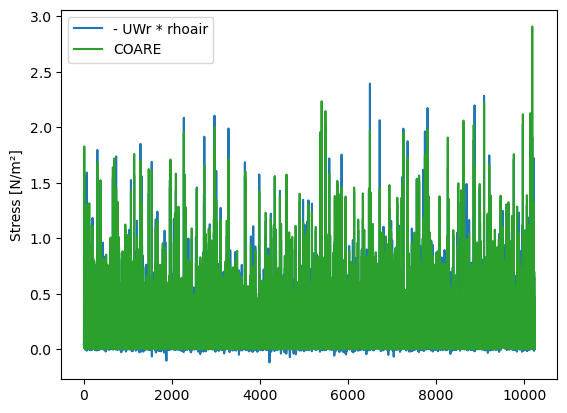

In [9]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

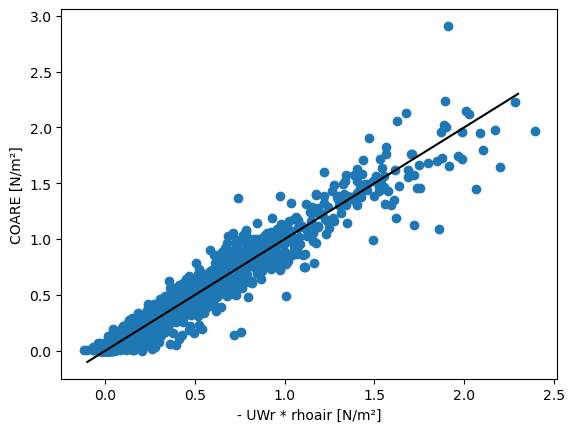

In [10]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [11]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [12]:
df.shape

(10243, 67)

In [13]:
df.shape[0]*0.8

8194.4

In [14]:
split_idx = int(df.shape[0]*0.8)
split_idx

8194

# Prepare features and labels

In [15]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
    'u10', 'v10'
]

In [16]:
x = df[predictor_variables]
x

sigma0_trip_fore  sigma0_trip_mid  sigma0_trip_aft  \
1021         -18.762613       -14.636559       -17.795702   
8319         -25.644943       -21.497477       -23.380905   
5481         -13.439209        -9.646365       -14.170560   
24           -22.434221       -20.062487       -21.378269   
3060         -16.206053       -15.942610       -17.163229   
...                 ...              ...              ...   
7832         -16.164724       -11.088709       -11.125629   
9509         -17.046478       -15.042265       -20.827862   
2283         -17.721455       -13.390714       -16.115215   
10196        -16.648899       -14.879584       -18.692530   
8799         -29.983627       -23.454725       -26.000984   

       azi_angle_trip_fore  azi_angle_trip_mid  azi_angle_trip_aft  \
1021            115.157921           70.284996           25.544584   
8319            103.337753           58.686115           13.992856   
5481             72.563271          117.101845          161.548981   
24              112.693260           67.873466           23.055511   
3060            -16.857756          -61.516117         -106.146538   
...                    ...                 ...                 ...   
7832            -18.339592          -63.027138         -107.893265   
9509            102.092850           57.455505           12.912857   
2283           -145.291595          -99.640388          -53.939598   
10196           -13.453673          -58.034081         -102.635712   
8799            -13.016531          -57.594078         -102.192245   

       inc_angle_trip_fore  inc_angle_trip_mid  inc_angle_trip_aft        u10  \
1021             50.996250           40.385418           50.870419   1.562817   
8319             57.315510           46.251427           57.263264   5.125797   
5481             56.841225           45.763264           56.661633   8.275084   
24               59.282860           48.124691           59.207134   2.763711   
3060             48.343266           37.708164           48.360004  -0.966533   
...                    ...                 ...                 ...        ...   
7832             44.879791           34.569183           44.961220 -10.460773   
9509             58.240410           47.163261           58.127552   2.308954   
2283             51.941601           41.123199           51.851196   0.494966   
10196            58.308567           47.280609           58.358368  -3.682891   
8799             58.113880           47.084488           58.156120   5.731460   

             v10  
1021   -0.072222  
8319   -3.413611  
5481    6.100164  
24      1.752537  
3060    3.281086  
...          ...  
7832   -6.665235  
9509   -3.119556  
2283    1.721997  
10196  16.288317  
8799    0.836468  

[10243 rows x 11 columns]

In [17]:
y = - df['UWr'] * df['rhoair']
y

1021     0.045617
8319     0.027719
5481     0.861360
24       0.012714
3060     0.305435
           ...   
7832     0.475317
9509     0.406820
2283     0.181099
10196    0.416900
8799     0.006362
Length: 10243, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [18]:
c = df['stress']

In [19]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [20]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [21]:
c_train = c[:split_idx]
c_test = c[split_idx:]

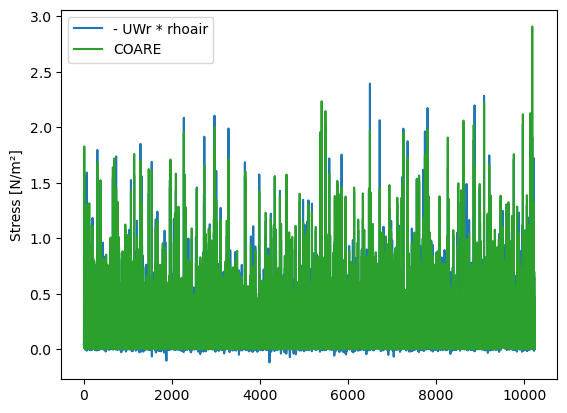

In [22]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [23]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

# ML setup

In [24]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [25]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [26]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500


2023-08-29 09:28:00.983148: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-29 09:28:00.983382: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-29 09:28:00.983390: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-29 09:28:00.983408: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-hw8rl83-bn-compute): /proc/driver/nvidia/version does not exist
2023-08-29 09:28:00.983596: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

180/180 [==============================] - 1s 2ms/step - loss: 2.5368 - mean_absolute_error: 1.1746 - val_loss: 2.1442 - val_mean_absolute_error: 1.0535
Epoch 2/500
180/180 [==============================] - 0s 594us/step - loss: 1.7315 - mean_absolute_error: 0.9505 - val_loss: 1.6066 - val_mean_absolute_error: 0.8824
Epoch 3/500
180/180 [==============================] - 0s 589us/step - loss: 1.3441 - mean_absolute_error: 0.7968 - val_loss: 1.2981 - val_mean_absolute_error: 0.7674
Epoch 4/500
180/180 [==============================] - 0s 607us/step - loss: 1.1740 - mean_absolute_error: 0.7292 - val_loss: 1.1199 - val_mean_absolute_error: 0.6924
Epoch 5/500
180/180 [==============================] - 0s 611us/step - loss: 0.9865 - mean_absolute_error: 0.6560 - val_loss: 1.0225 - val_mean_absolute_error: 0.6469
Epoch 6/500
180/180 [==============================] - 0s 604us/step - loss: 0.9808 - mean_absolute_error: 0.6302 - val_loss: 0.9660 - val_mean_absolute_error: 0.6166
Epoch 7/500


In [27]:
y_test_norm

1591    -0.534718
3913    -0.649322
1936    -0.625448
4360    -0.620142
8978    -0.039918
           ...   
7832     1.298946
9509     1.006760
2283     0.043891
10196    1.049757
8799    -0.701491
Length: 2049, dtype: float64

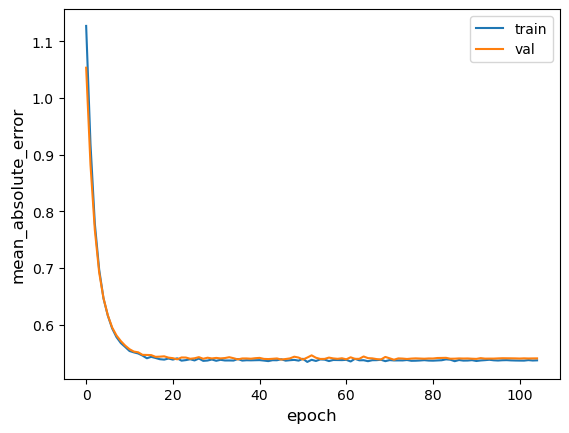

65/65 [==============================] - 0s 284us/step - loss: 0.9687 - mean_absolute_error: 0.5696
Test accuracy 0.5696099400520325
Test loss 0.9687288403511047


In [28]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [29]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [30]:
np.mean(y_test)

0.1827064895715611

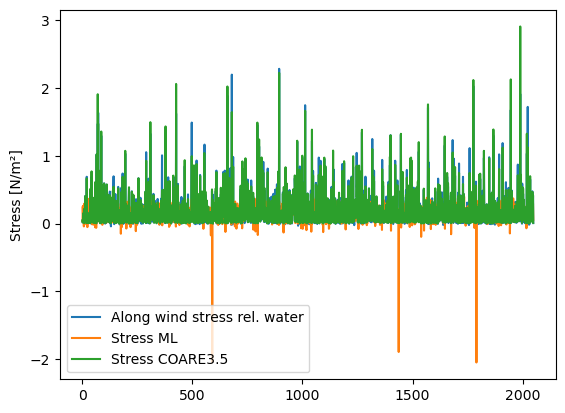

In [31]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

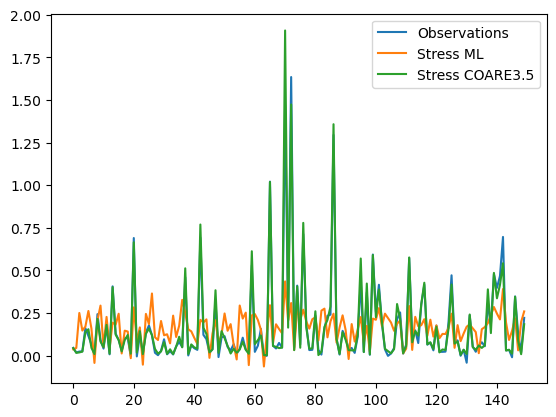

In [32]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

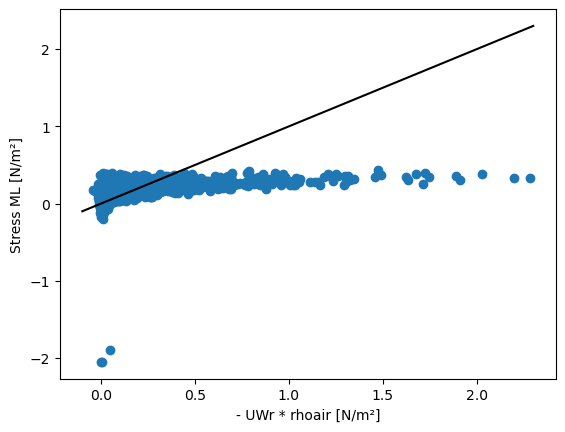

In [33]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

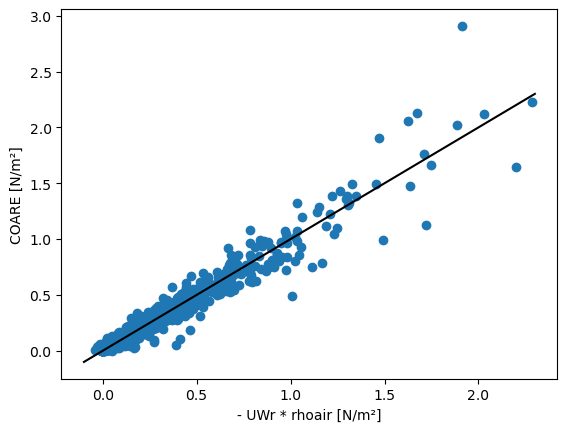

In [34]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [35]:
rmse(y_test.values, y_test_pred)

0.28245931936778196

In [36]:
rmse(y_test.values, c_test)

0.05781121066754841

## Correlation

In [37]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.41918232],
       [0.41918232, 1.        ]])

In [38]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

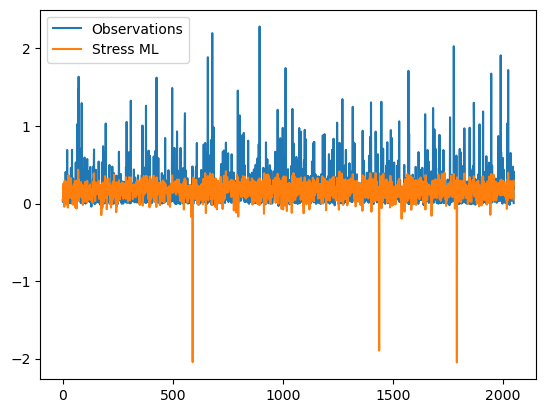

In [39]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [40]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.41918232],
       [0.41918232, 1.        ]])

In [41]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

In [42]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.28245931936778196

## Correlation

In [43]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.41918232],
       [0.41918232, 1.        ]])

In [44]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

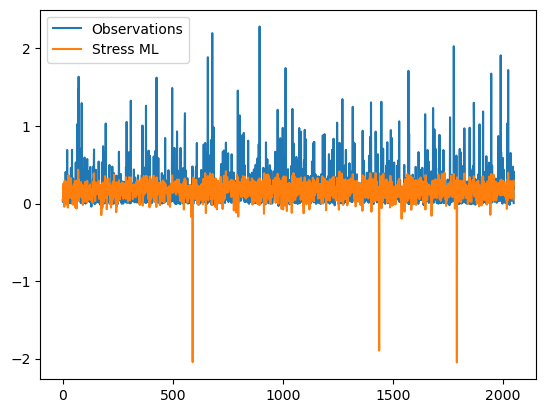

In [45]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [46]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.41918232],
       [0.41918232, 1.        ]])

In [47]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

In [48]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.28245931936778196

# Other experiments

In [49]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [50]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [51]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
180/180 [==============================] - 1s 1ms/step - loss: 1.9494 - mean_absolute_error: 0.9956 - val_loss: 1.1213 - val_mean_absolute_error: 0.6766
Epoch 2/500
180/180 [==============================] - 0s 748us/step - loss: 0.9186 - mean_absolute_error: 0.6268 - val_loss: 0.8514 - val_mean_absolute_error: 0.5683
Epoch 3/500
180/180 [==============================] - 0s 708us/step - loss: 0.7279 - mean_absolute_error: 0.5763 - val_loss: 0.7736 - val_mean_absolute_error: 0.5466
Epoch 4/500
180/180 [==============================] - 0s 701us/step - loss: 0.7353 - mean_absolute_error: 0.5647 - val_loss: 0.7426 - val_mean_absolute_error: 0.5308
Epoch 5/500
180/180 [==============================] - 0s 689us/step - loss: 0.6903 - mean_absolute_error: 0.5479 - val_loss: 0.7280 - val_mean_absolute_error: 0.5240
Epoch 6/500
180/180 [==============================] - 0s 704us/step - loss: 0.6745 - mean_absolute_error: 0.5351 - val_loss: 0.7097 - val_mean_absolute_error: 0.5134


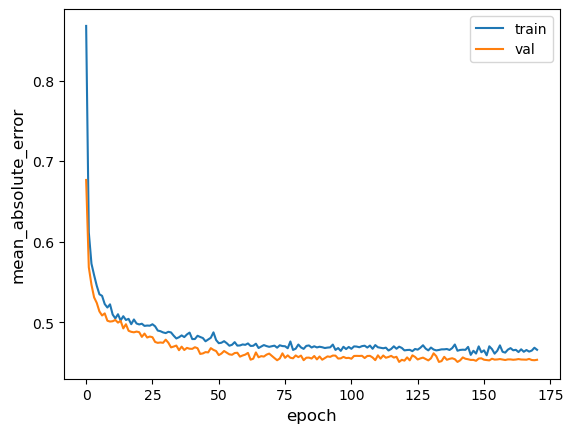

65/65 [==============================] - 0s 338us/step - loss: 0.6750 - mean_absolute_error: 0.4780
Test accuracy 0.4779927432537079
Test loss 0.674969494342804


In [52]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [53]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

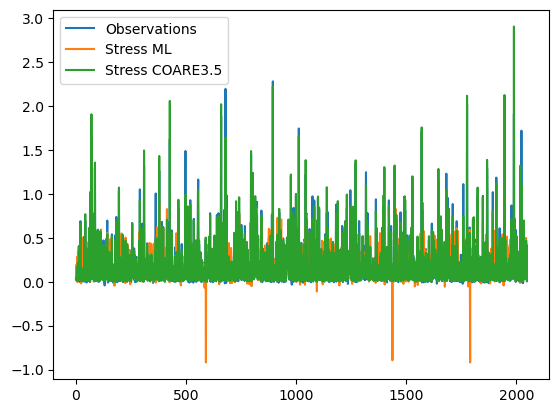

In [54]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

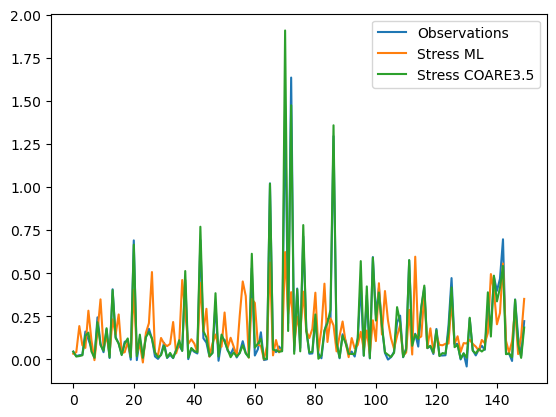

In [55]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [56]:
rmse(y_test.values, y_test_pred)

0.29584706084739587

## Correlation

In [57]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.65084763],
       [0.65084763, 1.        ]])

In [58]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

In [59]:
y_test.values.shape

(2049,)

In [60]:
y_test_pred[:, 0].shape

(2049,)

In [61]:
(y_test_pred > -2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [62]:
y_test.values[(y_test_pred[:, 0] > -2)]

array([0.04545765, 0.01859144, 0.02418804, ..., 0.1810988 , 0.41690002,
       0.00636154])

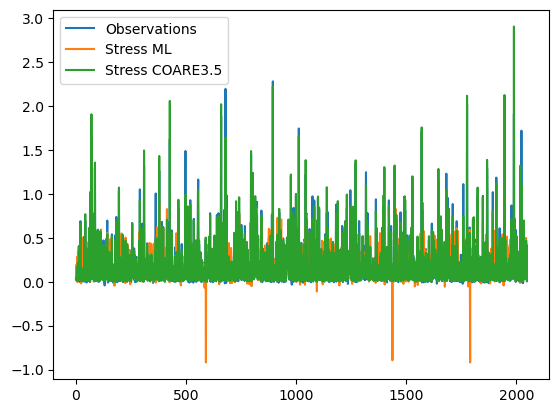

In [63]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

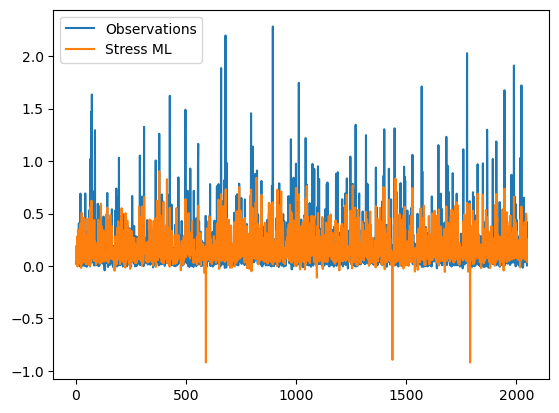

In [64]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [65]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

In [66]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.29584706084739587

Text(0, 0.5, 'Stress ML [N/m²]')

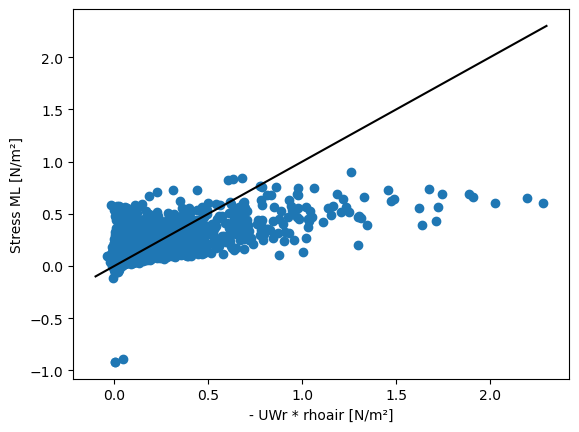

In [67]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [68]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [69]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [70]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
90/90 [==============================] - 0s 2ms/step - loss: 3.0268 - mean_absolute_error: 1.2619 - val_loss: 1.4853 - val_mean_absolute_error: 0.8013
Epoch 2/500
90/90 [==============================] - 0s 825us/step - loss: 2.0795 - mean_absolute_error: 1.0225 - val_loss: 1.1155 - val_mean_absolute_error: 0.6733
Epoch 3/500
90/90 [==============================] - 0s 848us/step - loss: 1.6153 - mean_absolute_error: 0.9018 - val_loss: 0.9219 - val_mean_absolute_error: 0.5993
Epoch 4/500
90/90 [==============================] - 0s 863us/step - loss: 1.3405 - mean_absolute_error: 0.8093 - val_loss: 0.8395 - val_mean_absolute_error: 0.5654
Epoch 5/500
90/90 [==============================] - 0s 856us/step - loss: 1.1431 - mean_absolute_error: 0.7431 - val_loss: 0.8070 - val_mean_absolute_error: 0.5519
Epoch 6/500
90/90 [==============================] - 0s 864us/step - loss: 1.0342 - mean_absolute_error: 0.7027 - val_loss: 0.7764 - val_mean_absolute_error: 0.5366
Epoch 7/500


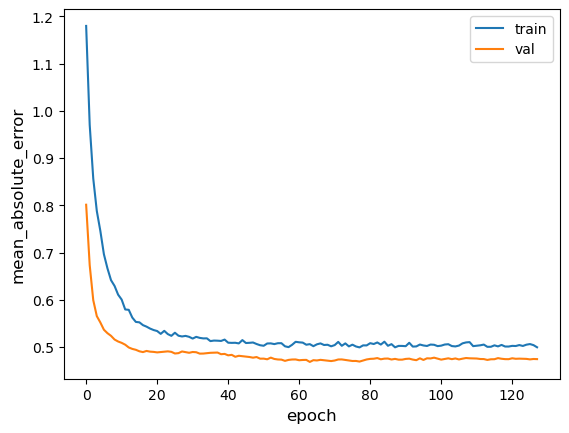

65/65 [==============================] - 0s 312us/step - loss: 0.7222 - mean_absolute_error: 0.5015
Test accuracy 0.5015043020248413
Test loss 0.7222093343734741


In [71]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [72]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [73]:
rmse(y_test.values, y_test_pred)

0.28406774075655167

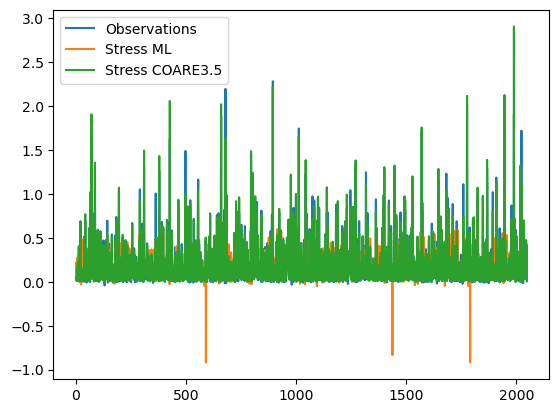

In [74]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

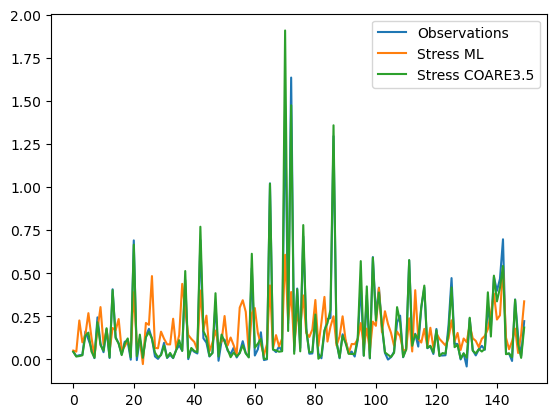

In [75]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

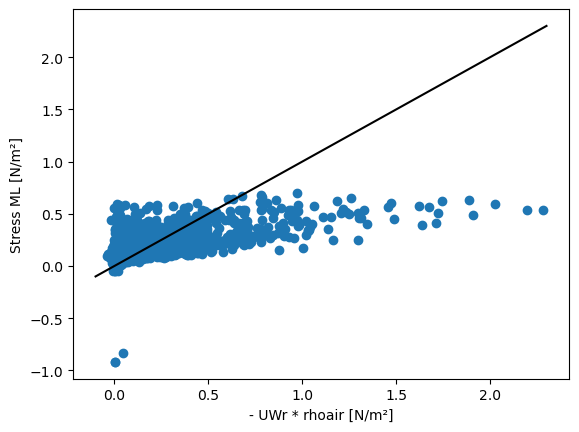

In [76]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [77]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.62849112],
       [0.62849112, 1.        ]])

In [78]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

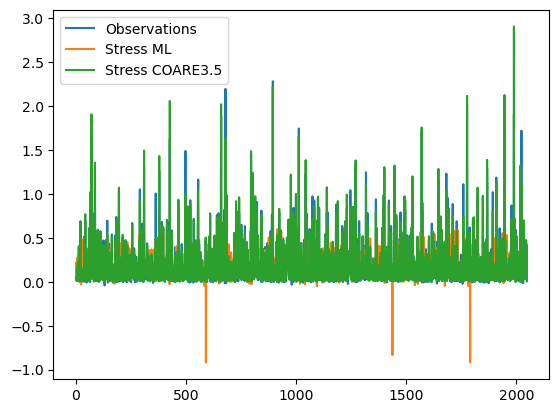

In [79]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

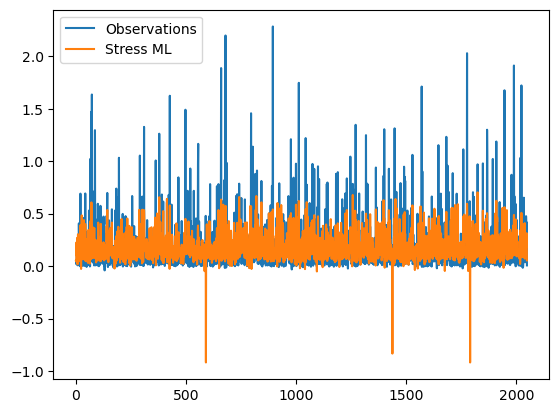

In [80]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [81]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

In [82]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.28406774075655167

Text(0, 0.5, 'Stress ML [N/m²]')

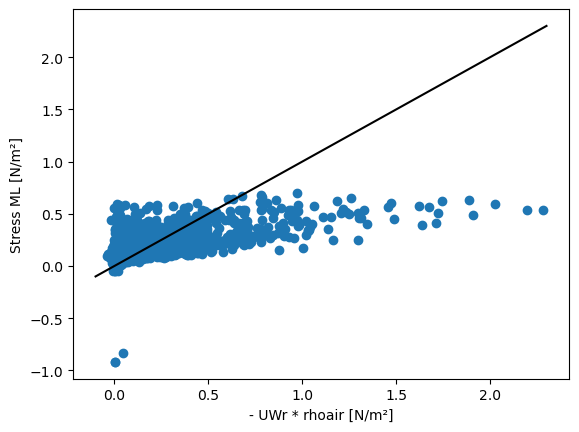

In [83]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [84]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [85]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [86]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
180/180 [==============================] - 1s 1ms/step - loss: 3.9150 - mean_absolute_error: 1.4380 - val_loss: 1.5083 - val_mean_absolute_error: 0.7458
Epoch 2/500
180/180 [==============================] - 0s 716us/step - loss: 1.9929 - mean_absolute_error: 1.0363 - val_loss: 1.1414 - val_mean_absolute_error: 0.6712
Epoch 3/500
180/180 [==============================] - 0s 715us/step - loss: 1.5599 - mean_absolute_error: 0.9019 - val_loss: 1.0289 - val_mean_absolute_error: 0.6213
Epoch 4/500
180/180 [==============================] - 0s 707us/step - loss: 1.3007 - mean_absolute_error: 0.7971 - val_loss: 0.9812 - val_mean_absolute_error: 0.6115
Epoch 5/500
180/180 [==============================] - 0s 731us/step - loss: 1.1180 - mean_absolute_error: 0.7223 - val_loss: 0.9581 - val_mean_absolute_error: 0.6024
Epoch 6/500
180/180 [==============================] - 0s 751us/step - loss: 0.9587 - mean_absolute_error: 0.6789 - val_loss: 0.9397 - val_mean_absolute_error: 0.5992


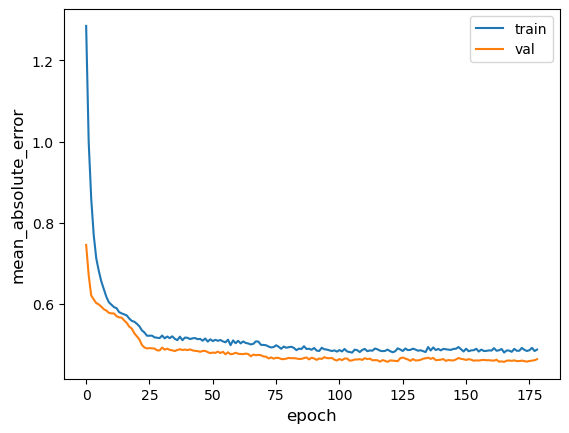

65/65 [==============================] - 0s 306us/step - loss: 0.6810 - mean_absolute_error: 0.4881
Test accuracy 0.4881017506122589
Test loss 0.6810319423675537


In [87]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [88]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [89]:
rmse(y_test.values, y_test_pred)

0.2916249435838574

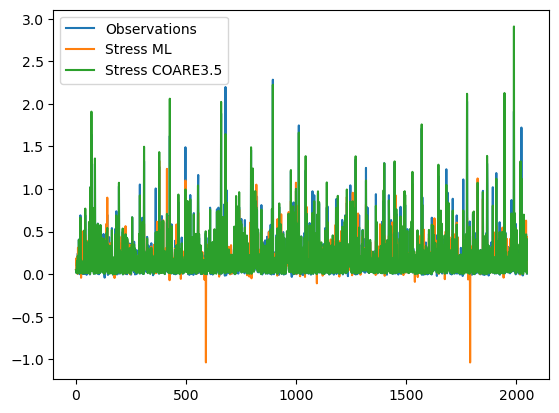

In [90]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

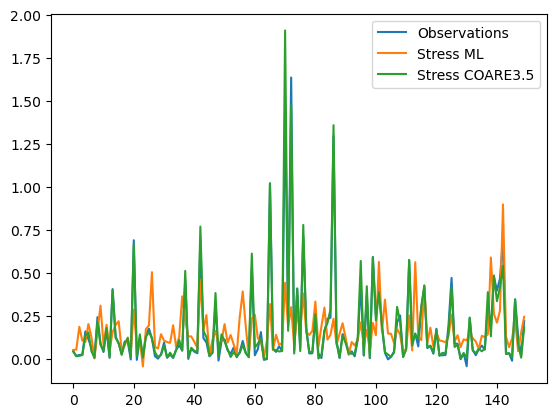

In [91]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

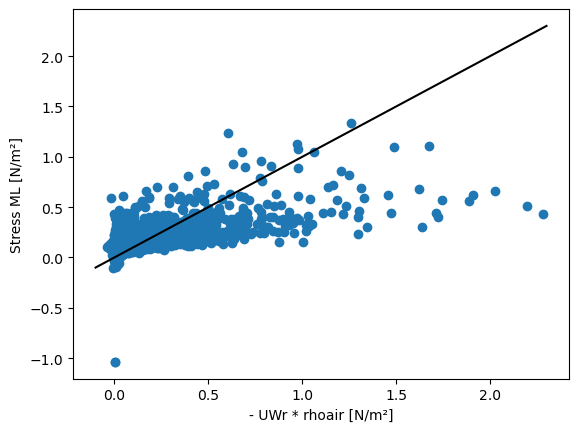

In [92]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [93]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.64939004],
       [0.64939004, 1.        ]])

In [94]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

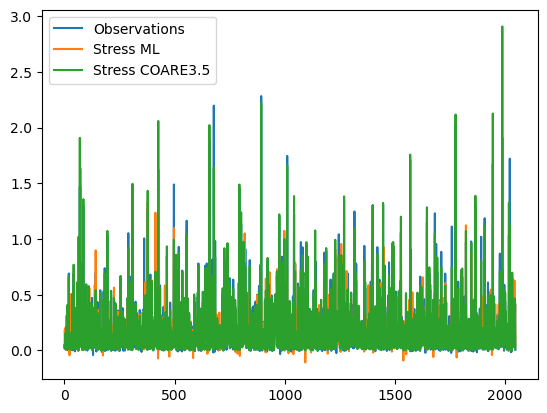

In [95]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -1], label='Stress COARE3.5')
plt.legend()

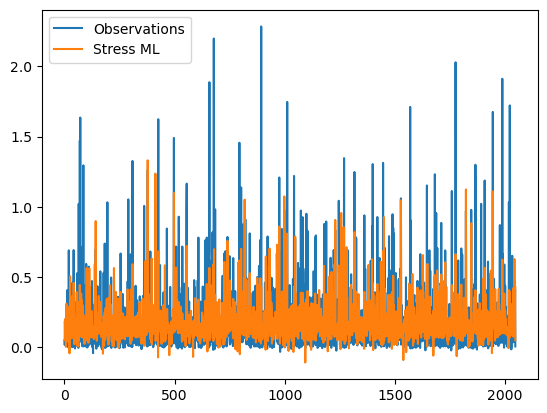

In [96]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [97]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97426617],
       [0.97426617, 1.        ]])

In [98]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.2892153731299638

Text(0, 0.5, 'Stress ML [N/m²]')

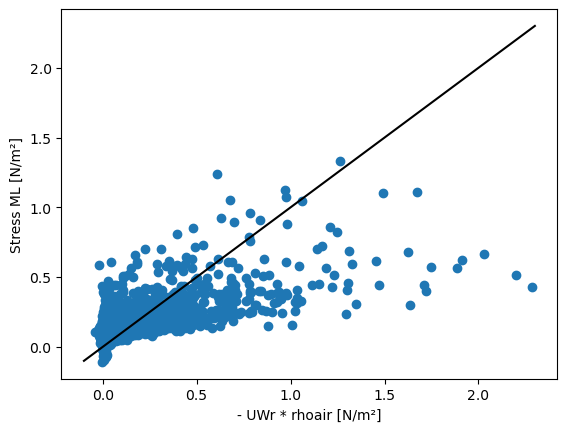

In [99]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [100]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [101]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [102]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
180/180 [==============================] - 1s 1ms/step - loss: 1.3056 - mean_absolute_error: 0.8317 - val_loss: 0.8114 - val_mean_absolute_error: 0.5440
Epoch 2/500
180/180 [==============================] - 0s 1ms/step - loss: 0.8505 - mean_absolute_error: 0.6559 - val_loss: 0.7126 - val_mean_absolute_error: 0.4964
Epoch 3/500
180/180 [==============================] - 0s 1ms/step - loss: 0.7759 - mean_absolute_error: 0.6033 - val_loss: 0.6347 - val_mean_absolute_error: 0.4608
Epoch 4/500
180/180 [==============================] - 0s 1ms/step - loss: 0.6140 - mean_absolute_error: 0.5341 - val_loss: 0.6012 - val_mean_absolute_error: 0.4527
Epoch 5/500
180/180 [==============================] - 0s 1ms/step - loss: 0.6444 - mean_absolute_error: 0.5324 - val_loss: 0.5779 - val_mean_absolute_error: 0.4415
Epoch 6/500
180/180 [==============================] - 0s 1ms/step - loss: 0.6269 - mean_absolute_error: 0.5204 - val_loss: 0.5849 - val_mean_absolute_error: 0.4423
Epoch 7/50

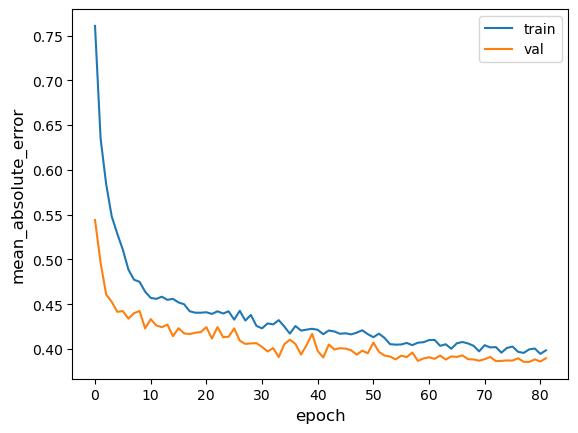

65/65 [==============================] - 0s 368us/step - loss: 1.3377 - mean_absolute_error: 0.4373
Test accuracy 0.437258243560791
Test loss 1.3376950025558472


In [103]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [104]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [105]:
rmse(y_test.values, y_test_pred)

0.37669986815023676

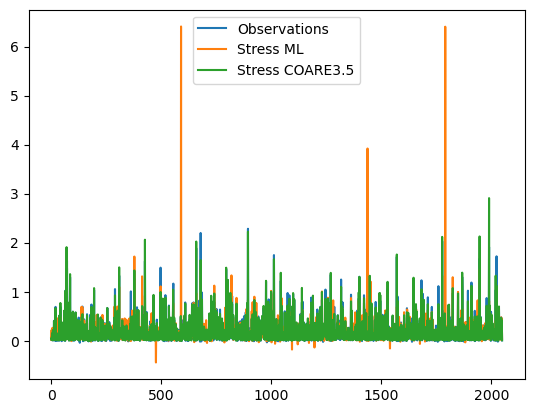

In [106]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

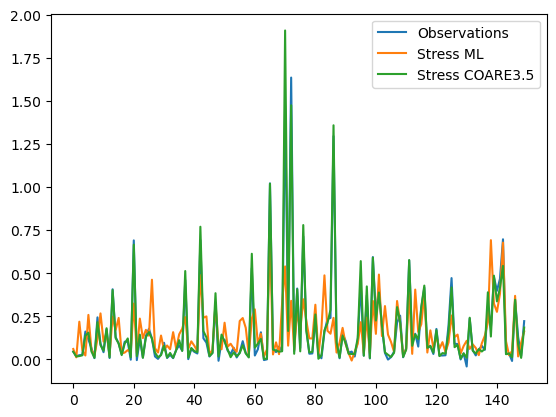

In [107]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

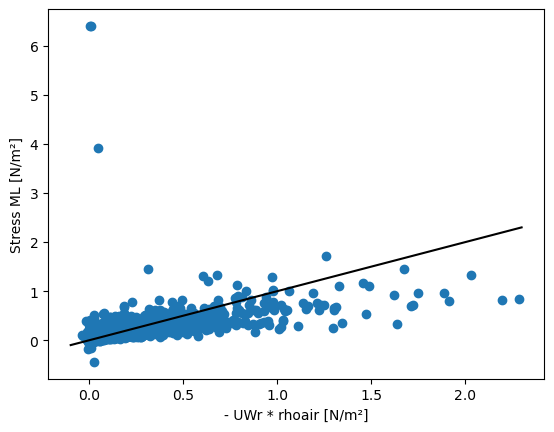

In [108]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [109]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.48433035],
       [0.48433035, 1.        ]])

In [110]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

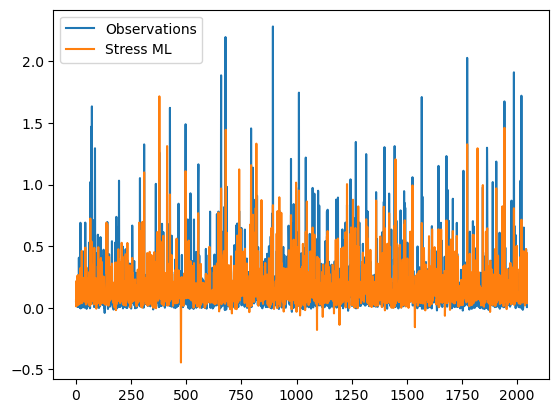

In [111]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [112]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2.5], c_test.values[y_test_pred[:, 0] < 2.5])

array([[1.        , 0.97426281],
       [0.97426281, 1.        ]])

In [113]:
rmse(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])

0.3120604514946278

Text(0, 0.5, 'Stress ML [N/m²]')

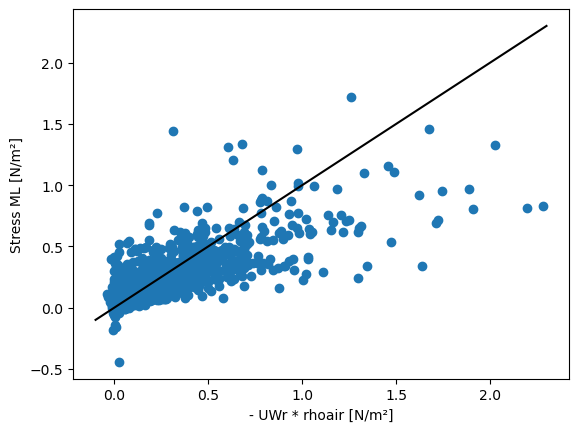

In [114]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [115]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.48433035],
       [0.48433035, 1.        ]])

In [116]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

In [117]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [118]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [119]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
180/180 [==============================] - 1s 4ms/step - loss: 2.8104 - mean_absolute_error: 1.1915 - val_loss: 0.8792 - val_mean_absolute_error: 0.5992
Epoch 2/500
180/180 [==============================] - 1s 4ms/step - loss: 1.0335 - mean_absolute_error: 0.7376 - val_loss: 0.7248 - val_mean_absolute_error: 0.5256
Epoch 3/500
180/180 [==============================] - 1s 4ms/step - loss: 0.7374 - mean_absolute_error: 0.6041 - val_loss: 0.6833 - val_mean_absolute_error: 0.5335
Epoch 4/500
180/180 [==============================] - 1s 4ms/step - loss: 0.6173 - mean_absolute_error: 0.5581 - val_loss: 0.5755 - val_mean_absolute_error: 0.4888
Epoch 5/500
180/180 [==============================] - 1s 4ms/step - loss: 0.5563 - mean_absolute_error: 0.5099 - val_loss: 0.5254 - val_mean_absolute_error: 0.4591
Epoch 6/500
180/180 [==============================] - 1s 4ms/step - loss: 0.5464 - mean_absolute_error: 0.4954 - val_loss: 0.5153 - val_mean_absolute_error: 0.4288
Epoch 7/50

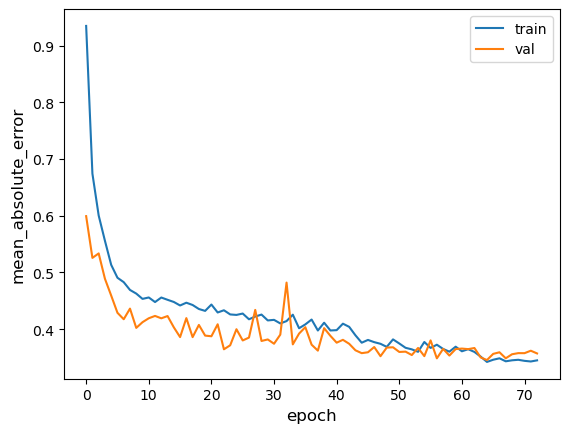

65/65 [==============================] - 0s 739us/step - loss: 0.6082 - mean_absolute_error: 0.3775
Test accuracy 0.3774682879447937
Test loss 0.6082001328468323


In [120]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [121]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [122]:
rmse(y_test.values, y_test_pred)

0.3395577249685952

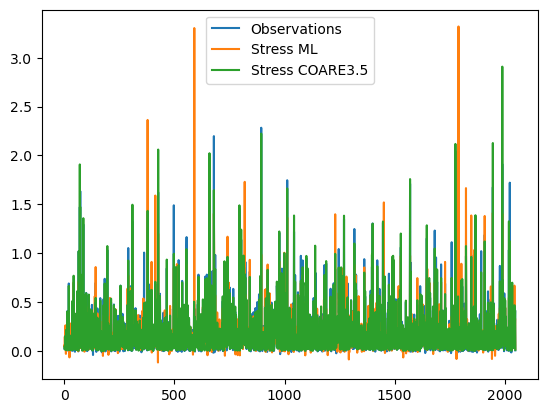

In [123]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

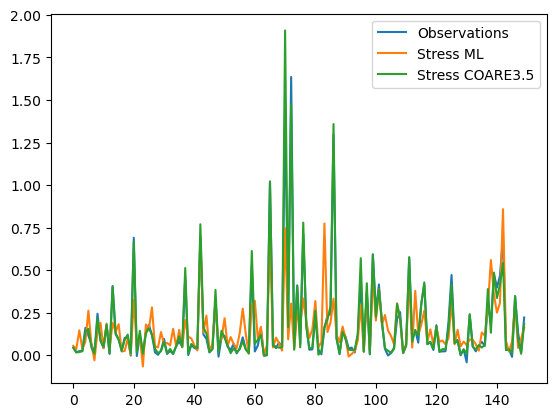

In [124]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [125]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.71454148],
       [0.71454148, 1.        ]])

In [126]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

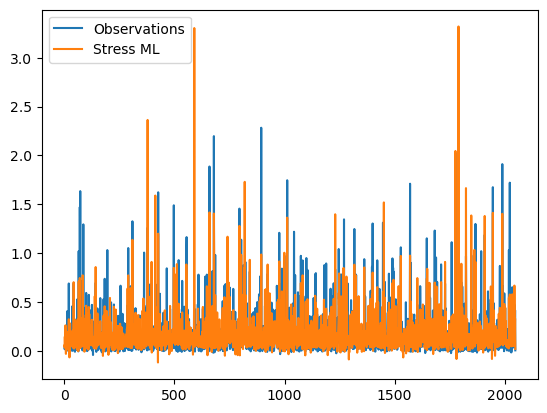

In [127]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [128]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

In [129]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.3395577249685952

Text(0, 0.5, 'Stress ML [N/m²]')

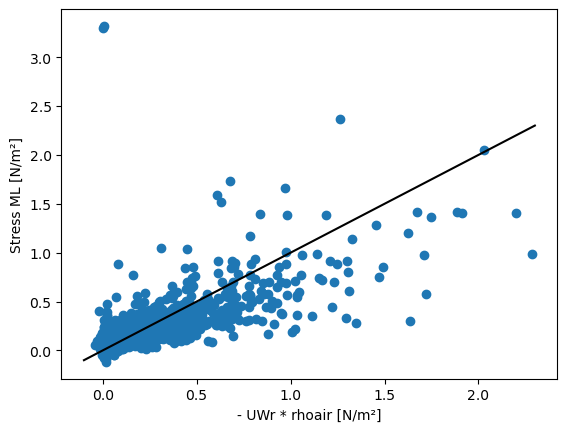

In [130]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [131]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [132]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [133]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
180/180 [==============================] - 3s 12ms/step - loss: 2.7455 - mean_absolute_error: 1.1516 - val_loss: 0.9503 - val_mean_absolute_error: 0.5909
Epoch 2/500
180/180 [==============================] - 2s 12ms/step - loss: 0.9633 - mean_absolute_error: 0.7074 - val_loss: 0.7942 - val_mean_absolute_error: 0.6171
Epoch 3/500
180/180 [==============================] - 2s 12ms/step - loss: 0.7756 - mean_absolute_error: 0.6178 - val_loss: 0.5711 - val_mean_absolute_error: 0.4542
Epoch 4/500
180/180 [==============================] - 2s 11ms/step - loss: 0.6493 - mean_absolute_error: 0.5672 - val_loss: 0.5139 - val_mean_absolute_error: 0.4257
Epoch 5/500
180/180 [==============================] - 2s 11ms/step - loss: 0.6256 - mean_absolute_error: 0.5384 - val_loss: 0.5322 - val_mean_absolute_error: 0.4406
Epoch 6/500
180/180 [==============================] - 2s 11ms/step - loss: 0.5474 - mean_absolute_error: 0.4912 - val_loss: 0.4845 - val_mean_absolute_error: 0.4273
Epoc

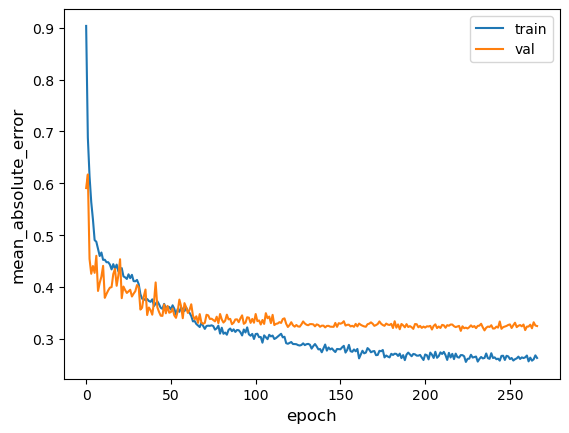

65/65 [==============================] - 0s 2ms/step - loss: 0.3933 - mean_absolute_error: 0.3437
Test accuracy 0.3437294661998749
Test loss 0.3933361768722534


In [134]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [135]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [136]:
rmse(y_test.values, y_test_pred)

0.31713786685074535

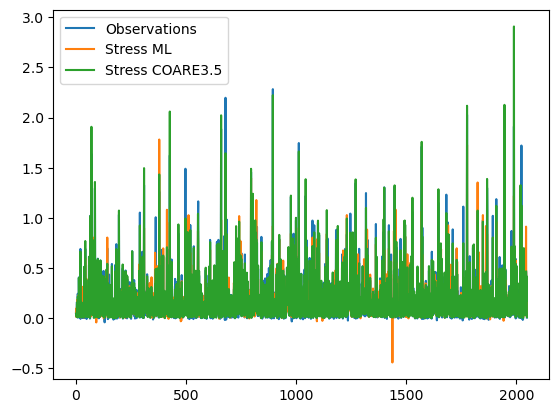

In [137]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

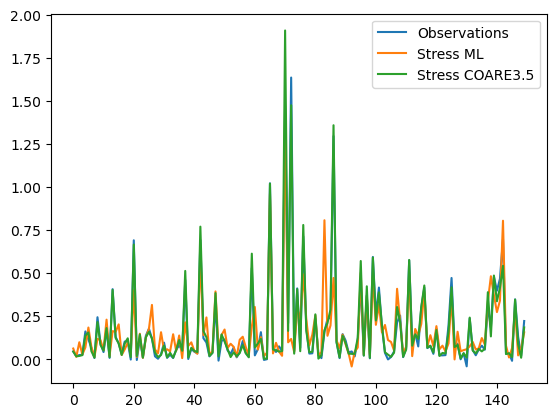

In [138]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [139]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.81833554],
       [0.81833554, 1.        ]])

In [140]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

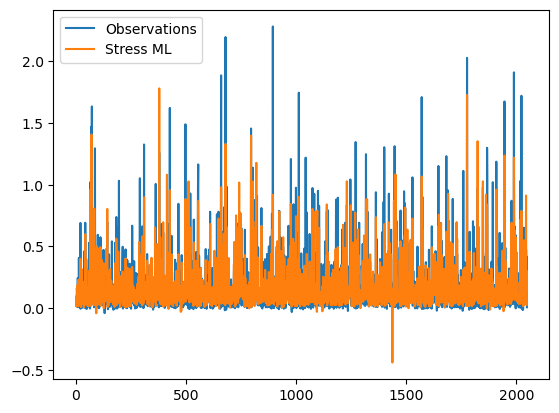

In [141]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [142]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

In [143]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.31713786685074535

Text(0, 0.5, 'Stress ML [N/m²]')

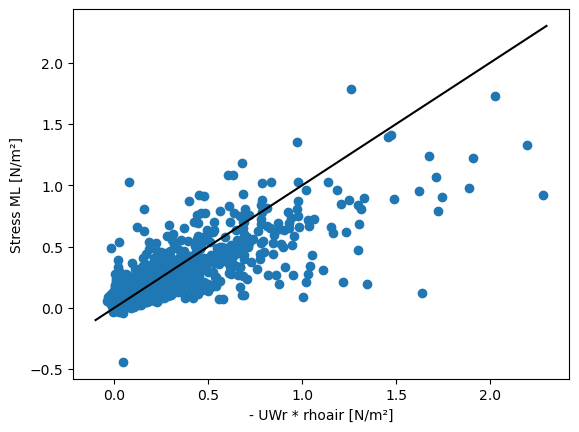

In [144]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

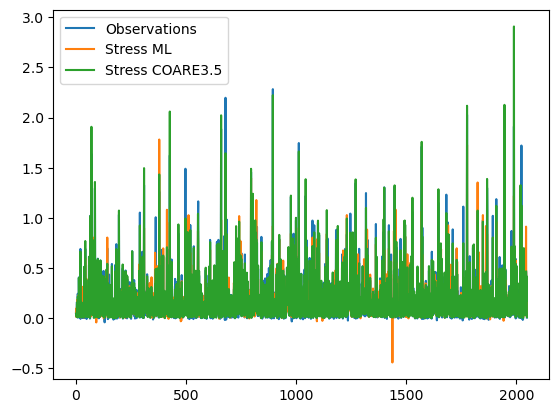

In [145]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -0.5], label='Stress COARE3.5')
plt.legend()

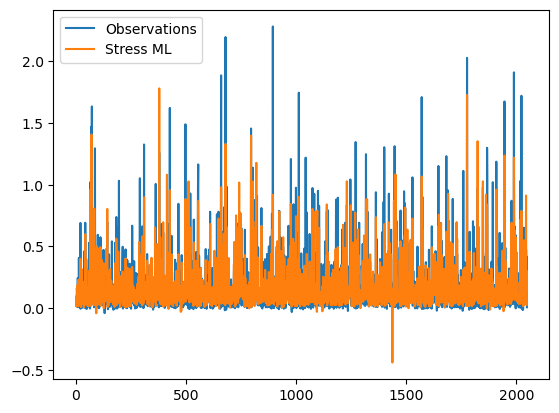

In [146]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.legend()

In [147]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5, 0])

array([[1.        , 0.81833554],
       [0.81833554, 1.        ]])

In [148]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], c_test.values[y_test_pred[:, 0] > -0.5])

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

In [149]:
rmse(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])

0.31713786685074535

Text(0, 0.5, 'Stress ML [N/m²]')

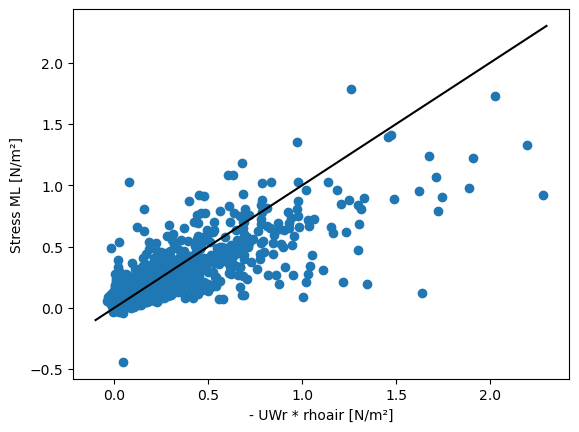

In [150]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [151]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [152]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [153]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 36ms/step - loss: 16.1863 - mean_absolute_error: 2.5044 - val_loss: 1.0253 - val_mean_absolute_error: 0.6521
Epoch 2/500
12/12 [==============================] - 0s 28ms/step - loss: 1.7846 - mean_absolute_error: 0.9906 - val_loss: 1.0186 - val_mean_absolute_error: 0.6264
Epoch 3/500
12/12 [==============================] - 0s 27ms/step - loss: 1.4275 - mean_absolute_error: 0.8689 - val_loss: 0.9989 - val_mean_absolute_error: 0.6739
Epoch 4/500
12/12 [==============================] - 0s 28ms/step - loss: 1.0929 - mean_absolute_error: 0.7460 - val_loss: 0.9917 - val_mean_absolute_error: 0.6294
Epoch 5/500
12/12 [==============================] - 0s 28ms/step - loss: 1.0540 - mean_absolute_error: 0.7391 - val_loss: 1.0279 - val_mean_absolute_error: 0.6850
Epoch 6/500
12/12 [==============================] - 0s 28ms/step - loss: 0.9670 - mean_absolute_error: 0.7146 - val_loss: 1.0183 - val_mean_absolute_error: 0.6768
Epoch 7/500
12/

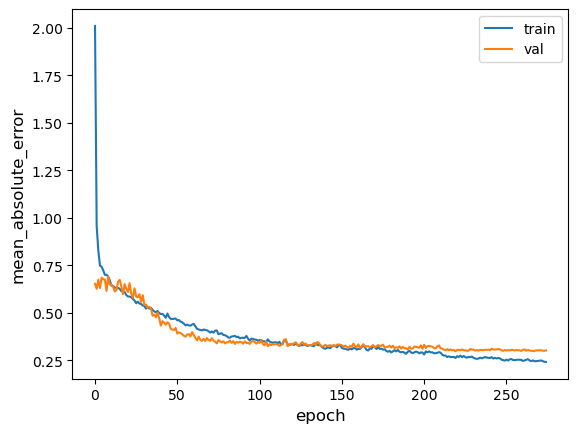

65/65 [==============================] - 0s 2ms/step - loss: 0.3560 - mean_absolute_error: 0.3270
Test accuracy 0.32699859142303467
Test loss 0.35599178075790405


In [154]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [155]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [156]:
rmse(y_test.values, y_test_pred)

0.3265116320749465

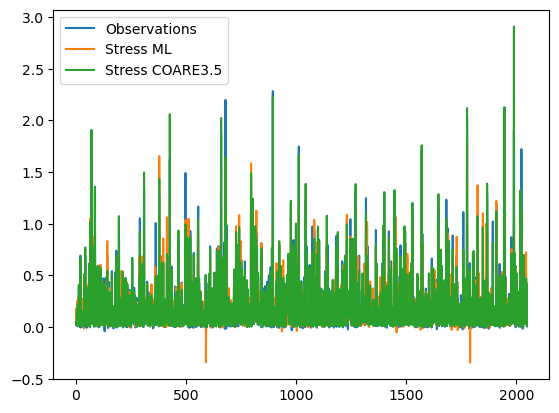

In [157]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

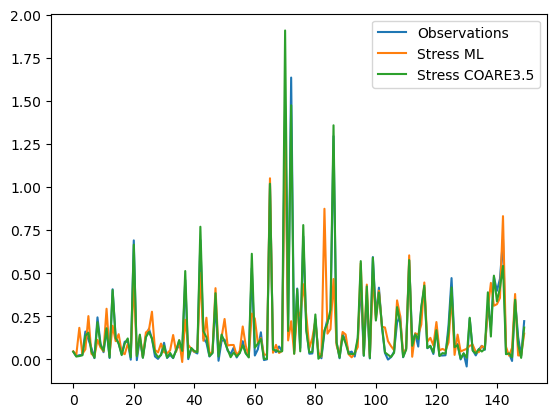

In [158]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [159]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.83453594],
       [0.83453594, 1.        ]])

In [160]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

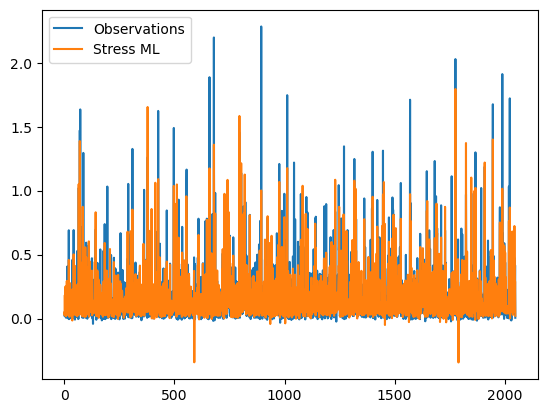

In [161]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [162]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

In [163]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3265116320749465

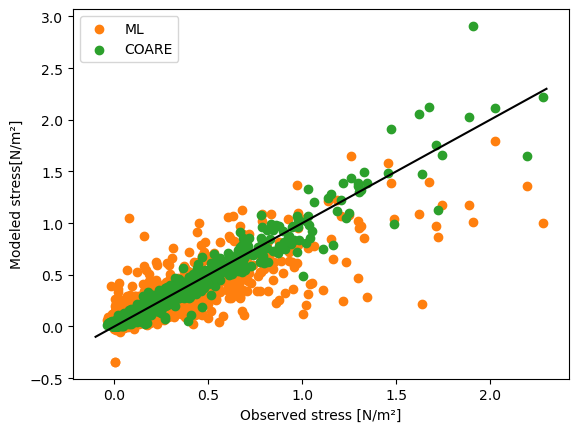

In [164]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

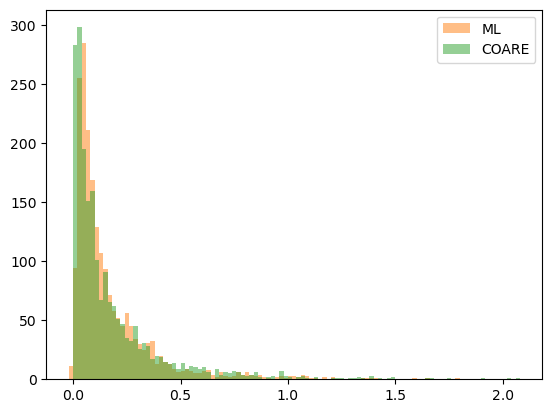

In [165]:
plt.hist(y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02)  )
plt.hist(c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02) )
plt.legend()

# Best model

In [166]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [167]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [168]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 37ms/step - loss: 20.1355 - mean_absolute_error: 2.7688 - val_loss: 1.0969 - val_mean_absolute_error: 0.6378
Epoch 2/500
12/12 [==============================] - 0s 28ms/step - loss: 2.2987 - mean_absolute_error: 1.1464 - val_loss: 1.0733 - val_mean_absolute_error: 0.5737
Epoch 3/500
12/12 [==============================] - 0s 28ms/step - loss: 1.1921 - mean_absolute_error: 0.8000 - val_loss: 1.1217 - val_mean_absolute_error: 0.5924
Epoch 4/500
12/12 [==============================] - 0s 28ms/step - loss: 1.0911 - mean_absolute_error: 0.7364 - val_loss: 1.0521 - val_mean_absolute_error: 0.5901
Epoch 5/500
12/12 [==============================] - 0s 27ms/step - loss: 1.1107 - mean_absolute_error: 0.7279 - val_loss: 1.0626 - val_mean_absolute_error: 0.5731
Epoch 6/500
12/12 [==============================] - 0s 27ms/step - loss: 1.0775 - mean_absolute_error: 0.7228 - val_loss: 1.1538 - val_mean_absolute_error: 0.5829
Epoch 7/500
12/

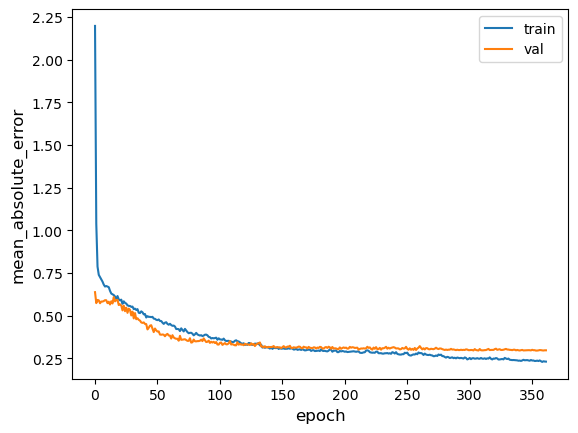

65/65 [==============================] - 0s 2ms/step - loss: 0.3365 - mean_absolute_error: 0.3199
Test accuracy 0.3199489414691925
Test loss 0.33649852871894836


In [169]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [170]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [171]:
rmse(y_test.values, y_test_pred)

0.33070404588256

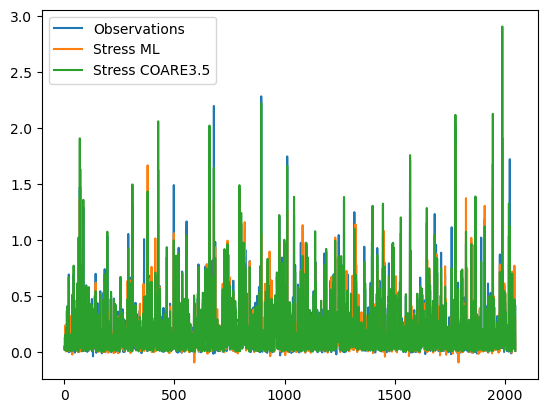

In [172]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

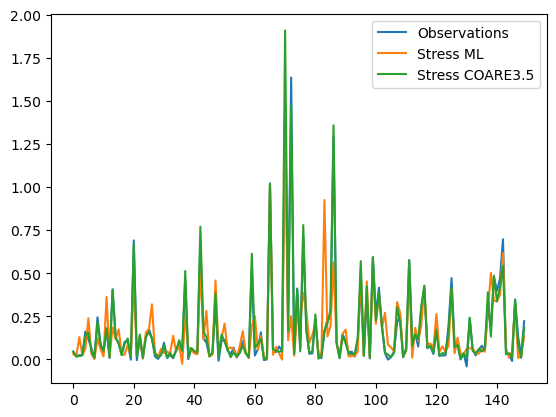

In [173]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [174]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.84571612],
       [0.84571612, 1.        ]])

In [175]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

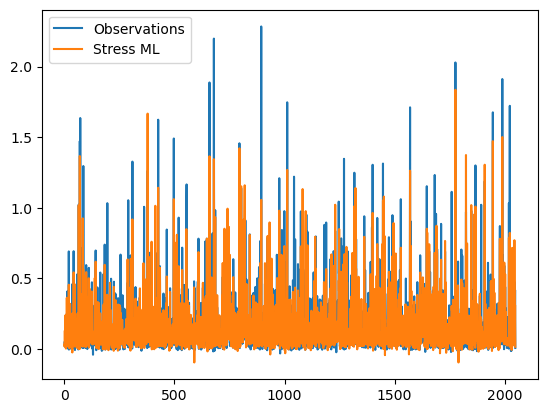

In [176]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [177]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

In [178]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.33070404588256

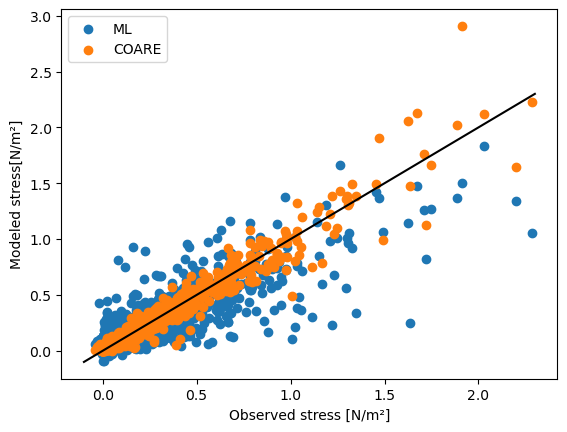

In [179]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

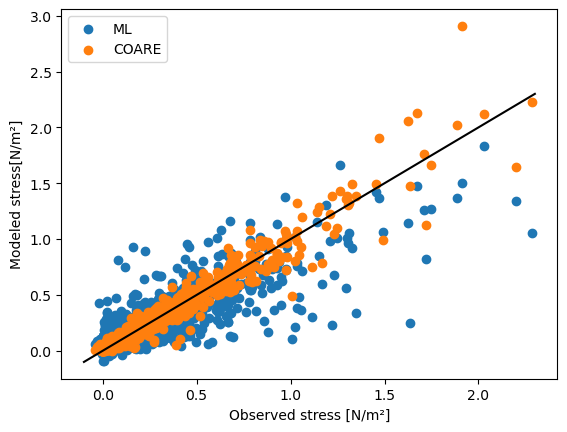

In [180]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [181]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [182]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [183]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
6/6 [==============================] - 2s 128ms/step - loss: 18.0289 - mean_absolute_error: 2.6506 - val_loss: 1.0729 - val_mean_absolute_error: 0.6221
Epoch 2/500
6/6 [==============================] - 1s 105ms/step - loss: 2.2707 - mean_absolute_error: 1.1249 - val_loss: 0.9991 - val_mean_absolute_error: 0.6191
Epoch 3/500
6/6 [==============================] - 1s 104ms/step - loss: 1.6137 - mean_absolute_error: 0.9046 - val_loss: 0.9967 - val_mean_absolute_error: 0.5884
Epoch 4/500
6/6 [==============================] - 1s 108ms/step - loss: 1.3658 - mean_absolute_error: 0.8171 - val_loss: 1.0181 - val_mean_absolute_error: 0.6310
Epoch 5/500
6/6 [==============================] - 1s 108ms/step - loss: 1.2721 - mean_absolute_error: 0.7791 - val_loss: 0.9838 - val_mean_absolute_error: 0.6082
Epoch 6/500
6/6 [==============================] - 1s 107ms/step - loss: 1.0418 - mean_absolute_error: 0.7230 - val_loss: 1.0076 - val_mean_absolute_error: 0.6133
Epoch 7/500
6/6 [====

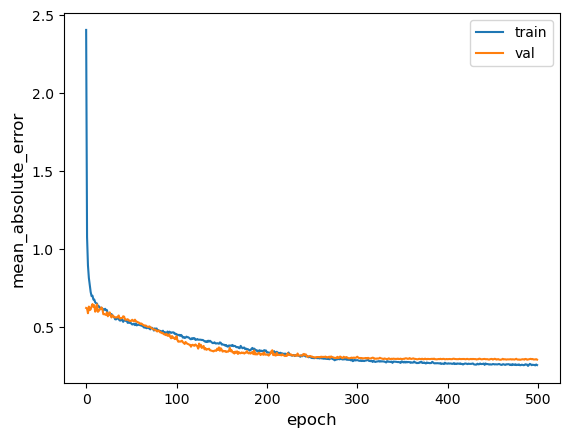

65/65 [==============================] - 0s 7ms/step - loss: 0.3335 - mean_absolute_error: 0.3189
Test accuracy 0.3189488649368286
Test loss 0.3335360288619995


In [184]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [185]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [186]:
rmse(y_test.values, y_test_pred)

0.33450812961671333

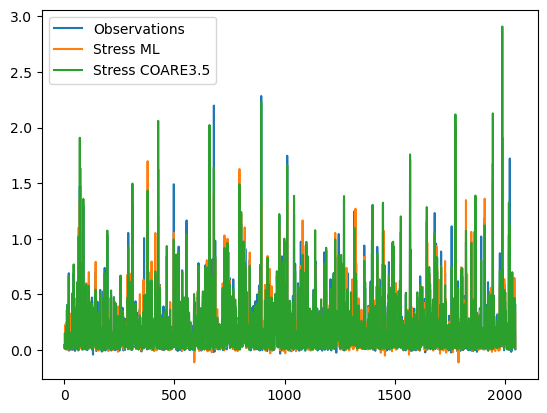

In [187]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

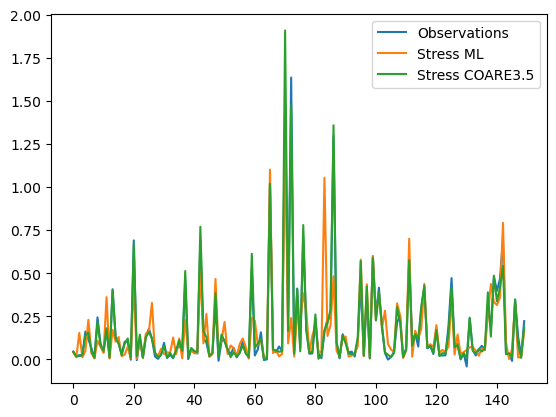

In [188]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [189]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.84693136],
       [0.84693136, 1.        ]])

In [190]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

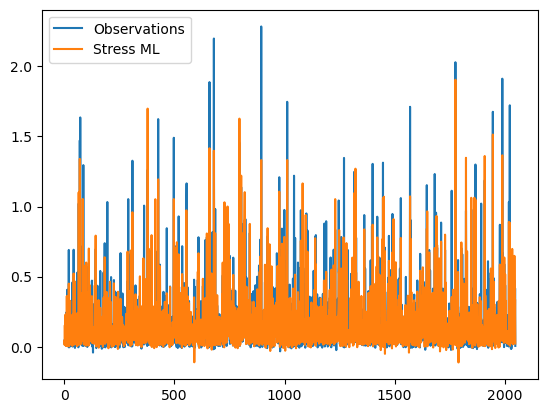

In [191]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [192]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

In [193]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.33450812961671333

Text(0, 0.5, 'Stress ML [N/m²]')

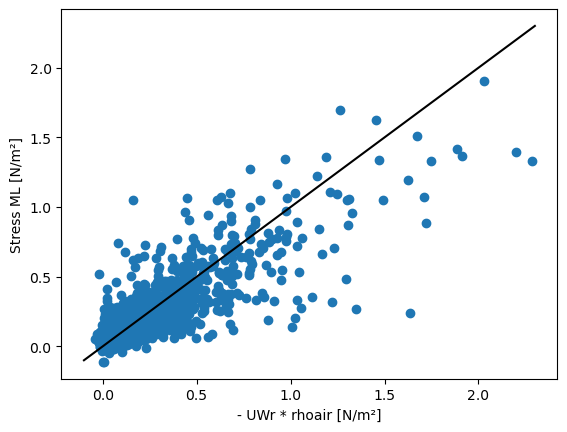

In [194]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

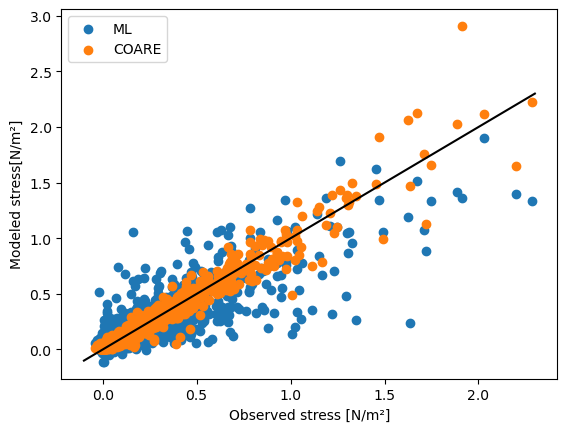

In [195]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [196]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [197]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [198]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 598ms/step - loss: 20.7102 - mean_absolute_error: 3.1976 - val_loss: 1.3149 - val_mean_absolute_error: 0.7761
Epoch 2/1000
3/3 [==============================] - 2s 533ms/step - loss: 3.1645 - mean_absolute_error: 1.2825 - val_loss: 1.1252 - val_mean_absolute_error: 0.7931
Epoch 3/1000
3/3 [==============================] - 2s 540ms/step - loss: 2.3440 - mean_absolute_error: 1.1068 - val_loss: 1.4124 - val_mean_absolute_error: 0.8829
Epoch 4/1000
3/3 [==============================] - 2s 544ms/step - loss: 1.8146 - mean_absolute_error: 0.9914 - val_loss: 0.8817 - val_mean_absolute_error: 0.6168
Epoch 5/1000
3/3 [==============================] - 2s 544ms/step - loss: 1.4870 - mean_absolute_error: 0.8733 - val_loss: 1.4190 - val_mean_absolute_error: 0.7162
Epoch 6/1000
3/3 [==============================] - 2s 546ms/step - loss: 1.4016 - mean_absolute_error: 0.8375 - val_loss: 1.1779 - val_mean_absolute_error: 0.5956
Epoch 7/1000
3/

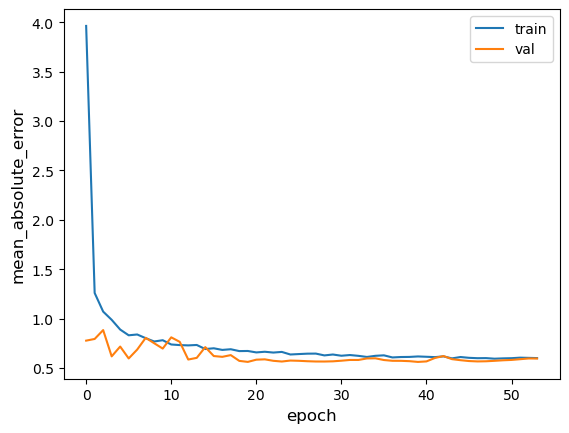

65/65 [==============================] - 2s 24ms/step - loss: 1.0865 - mean_absolute_error: 0.6130
Test accuracy 0.6129662394523621
Test loss 1.0865024328231812


In [199]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [200]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [201]:
rmse(y_test.values, y_test_pred)

0.25648334354741836

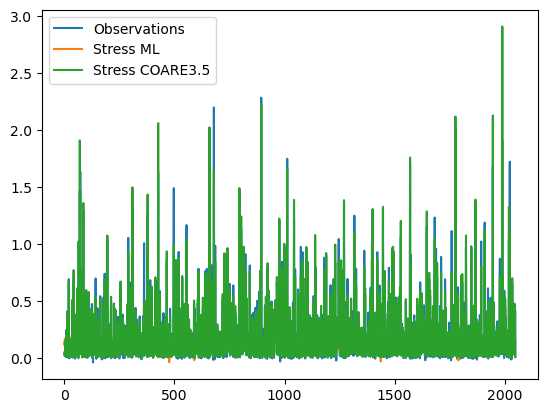

In [202]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

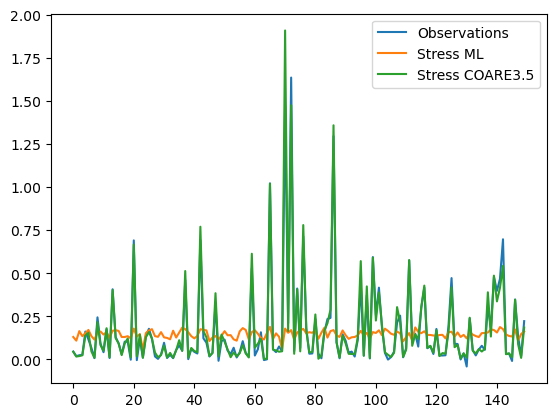

In [203]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [204]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.5013374],
       [0.5013374, 1.       ]])

In [205]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

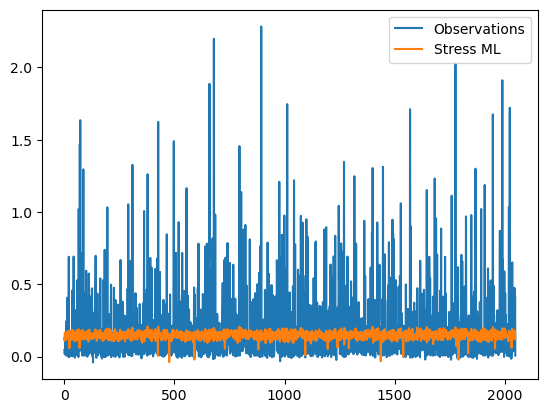

In [206]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [207]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

In [208]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.25648334354741836

Text(0, 0.5, 'Stress ML [N/m²]')

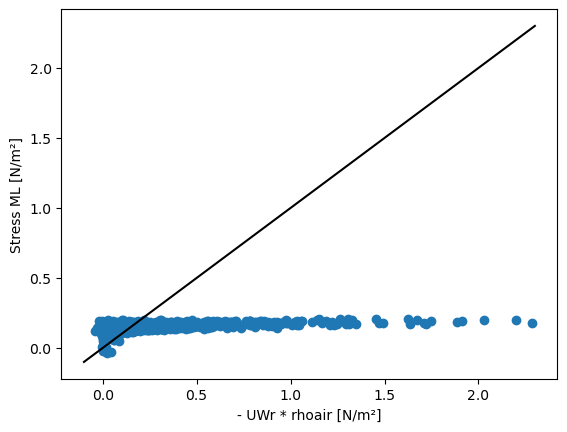

In [209]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [210]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [211]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [212]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 552ms/step - loss: 23.9193 - mean_absolute_error: 3.4002 - val_loss: 1.4966 - val_mean_absolute_error: 0.8853
Epoch 2/1000
3/3 [==============================] - 1s 493ms/step - loss: 3.0470 - mean_absolute_error: 1.3215 - val_loss: 1.7092 - val_mean_absolute_error: 0.9446
Epoch 3/1000
3/3 [==============================] - 1s 486ms/step - loss: 2.2485 - mean_absolute_error: 1.0930 - val_loss: 1.0020 - val_mean_absolute_error: 0.6405
Epoch 4/1000
3/3 [==============================] - 1s 484ms/step - loss: 1.7673 - mean_absolute_error: 0.9500 - val_loss: 1.9433 - val_mean_absolute_error: 0.7386
Epoch 5/1000
3/3 [==============================] - 1s 500ms/step - loss: 1.5285 - mean_absolute_error: 0.8699 - val_loss: 1.3439 - val_mean_absolute_error: 0.7133
Epoch 6/1000
3/3 [==============================] - 1s 492ms/step - loss: 1.5379 - mean_absolute_error: 0.8865 - val_loss: 1.6067 - val_mean_absolute_error: 0.8441
Epoch 7/1000
3/

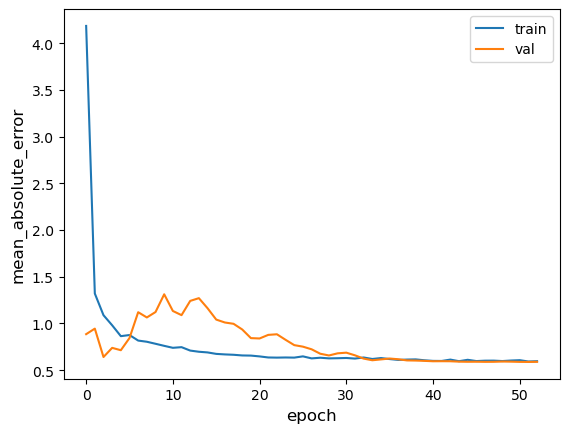

65/65 [==============================] - 2s 24ms/step - loss: 1.2444 - mean_absolute_error: 0.6092
Test accuracy 0.6092259287834167
Test loss 1.2444459199905396


In [213]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [214]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [215]:
rmse(y_test.values, y_test_pred)

0.26678457539228245

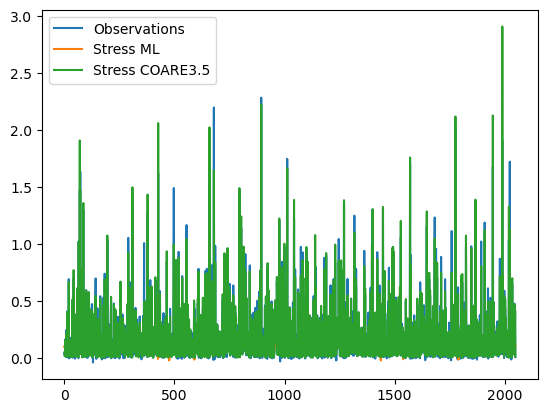

In [216]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

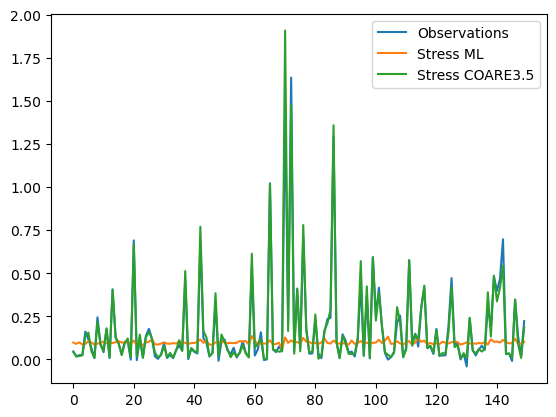

In [217]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [218]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.45853404],
       [0.45853404, 1.        ]])

In [219]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

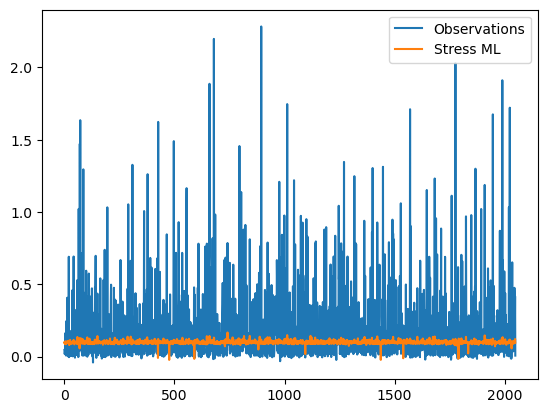

In [220]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [221]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

In [222]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.26678457539228245

Text(0, 0.5, 'Stress ML [N/m²]')

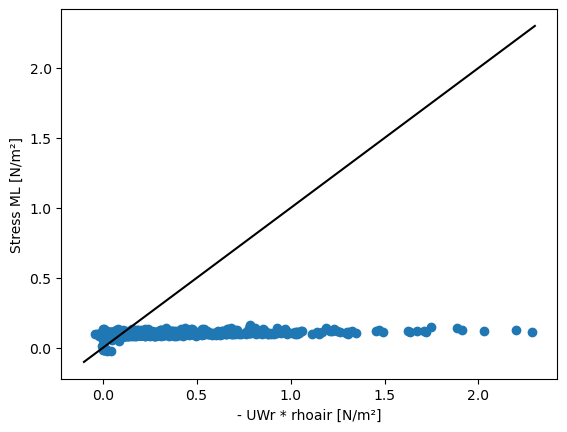

In [223]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [224]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_squared_error'

In [225]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [226]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 591ms/step - loss: 13.7886 - mean_absolute_error: 2.5233 - val_loss: 1.6229 - val_mean_absolute_error: 0.8796
Epoch 2/1000
3/3 [==============================] - 2s 533ms/step - loss: 4.1657 - mean_absolute_error: 1.5152 - val_loss: 1.8507 - val_mean_absolute_error: 0.7198
Epoch 3/1000
3/3 [==============================] - 2s 530ms/step - loss: 2.8331 - mean_absolute_error: 1.1400 - val_loss: 2.0756 - val_mean_absolute_error: 0.9612
Epoch 4/1000
3/3 [==============================] - 2s 533ms/step - loss: 2.2208 - mean_absolute_error: 1.0236 - val_loss: 2.6154 - val_mean_absolute_error: 1.0025
Epoch 5/1000
3/3 [==============================] - 2s 522ms/step - loss: 1.7631 - mean_absolute_error: 0.9393 - val_loss: 2.0586 - val_mean_absolute_error: 1.0752
Epoch 6/1000
3/3 [==============================] - 2s 530ms/step - loss: 1.2638 - mean_absolute_error: 0.7970 - val_loss: 2.0427 - val_mean_absolute_error: 1.1627
Epoch 7/1000
3/

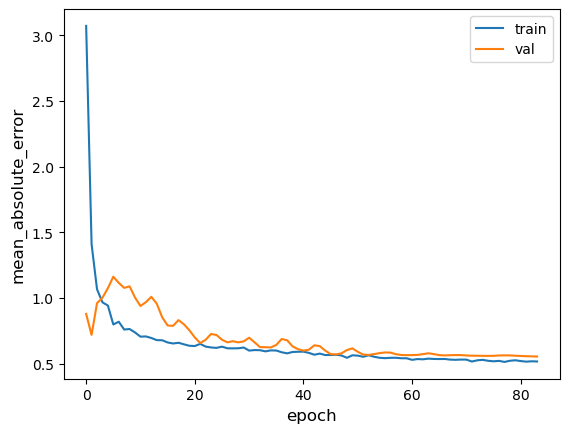

65/65 [==============================] - 2s 25ms/step - loss: 0.3786 - mean_absolute_error: 0.5398
Test accuracy 0.5398044586181641
Test loss 0.3785686492919922


In [227]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [228]:
y_test_pred = multi_dense_model.predict(x_test)

In [229]:
rmse(y_test.values, y_test_pred)

0.6251590947845741

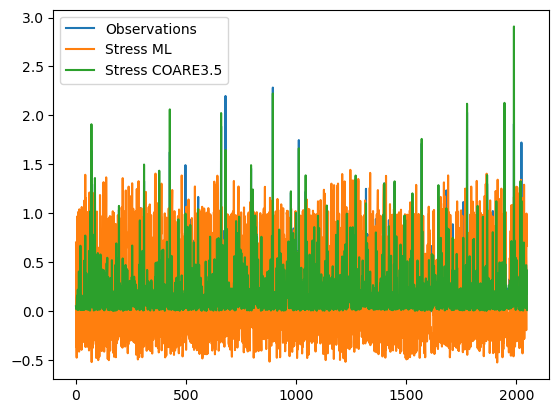

In [230]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

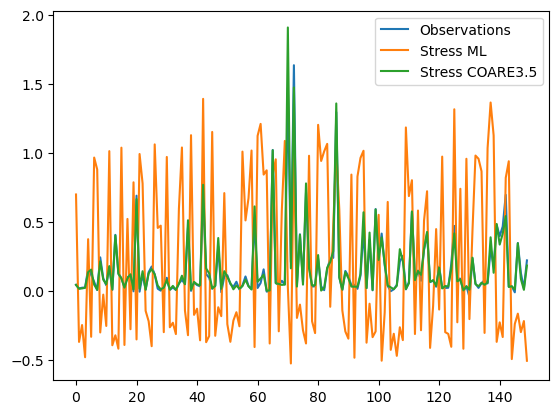

In [231]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [232]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.04239094],
       [0.04239094, 1.        ]])

In [233]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

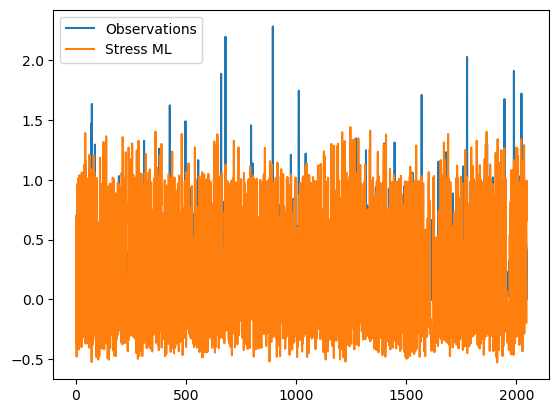

In [234]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [235]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97427835],
       [0.97427835, 1.        ]])

In [236]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.6251590947845741

Text(0, 0.5, 'Stress ML [N/m²]')

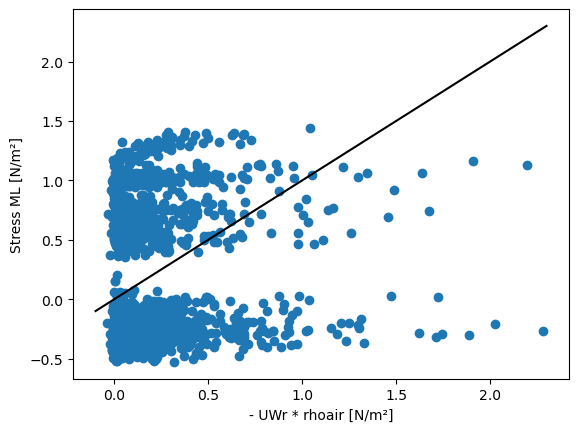

In [237]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 